<a href="https://colab.research.google.com/github/natsupon/portfolio/blob/main/%E7%94%BB%E5%83%8F%E8%83%8C%E6%99%AF%E5%88%87%E3%82%8A%E5%87%BA%E3%81%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [27]:
BLUR = 21
CANNY_THRESH_1 = 10
CANNY_THRESH_2 = 100
MASK_DILATE_ITER = 10
MASK_ERODE_ITER = 10
MASK_COLOR = (0.0,0.0,1.0)

In [28]:
img = cv2.imread('/content/drive/MyDrive/ポートフォリオ/プーさん.PNG')
cv2.imwrite('sample.jpg',img)


True

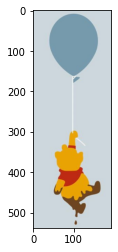

In [29]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

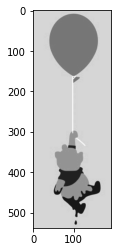

In [30]:
#エッジを見つける
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.show()

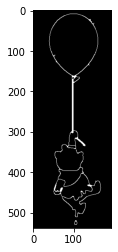

In [31]:
edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

plt.imshow(edges, cmap='gray')
plt.show()

In [32]:
#輪郭を見つける
contour_info = []
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for c in contours:
    contour_info.append((
        c,
        cv2.isContourConvex(c),
        cv2.contourArea(c),
    ))
contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
max_contour = contour_info[0]

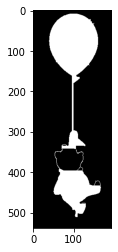

In [33]:
#マスクを作る
mask = np.zeros(edges.shape)
cv2.fillConvexPoly(mask, max_contour[0], (255))

plt.imshow(mask, cmap='gray')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


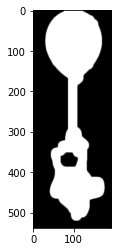

In [34]:
#マスクをスムージングさせ、３チャネルにする
mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

plt.imshow(mask_stack, cmap='gray')
plt.show()

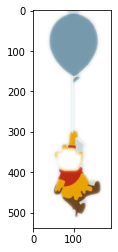

In [35]:
#マスクと背景を合体させる
mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
img         = img.astype('float32') / 255.0                 #  for easy blending

masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend
masked = (masked * 255).astype('uint8')                     # Convert back to 8-bit 

c_blue, c_green, c_red = cv2.split(img)

img_a = cv2.merge((c_red, c_green, c_blue, mask.astype('float32') / 255.0))

plt.imshow(img_a)
plt.show()

In [36]:
#パラメータチューニング
def remove_bg(
    path,
    BLUR = 21,
    CANNY_THRESH_1 = 10,
    CANNY_THRESH_2 = 200,
    MASK_DILATE_ITER = 10,
    MASK_ERODE_ITER = 10,
    MASK_COLOR = (0.0,0.0,1.0),
):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
    edges = cv2.dilate(edges, None)
    edges = cv2.erode(edges, None)

    contour_info = []
    contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    for c in contours:
        contour_info.append((
            c,
            cv2.isContourConvex(c),
            cv2.contourArea(c),
        ))
    contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
    max_contour = contour_info[0]

    mask = np.zeros(edges.shape)
    cv2.fillConvexPoly(mask, max_contour[0], (255))

    mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
    mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
    mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
    mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

    mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
    img         = img.astype('float32') / 255.0                 #  for easy blending

    masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend
    masked = (masked * 255).astype('uint8')                     # Convert back to 8-bit 

    c_blue, c_green, c_red = cv2.split(img)

    img_a = cv2.merge((c_red, c_green, c_blue, mask.astype('float32') / 255.0))


    plt.imshow(img_a)
    plt.show()
    return img_a

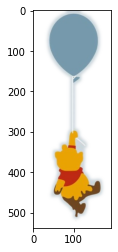

In [37]:
img_fin = remove_bg(    
    path = '/content/drive/MyDrive/ポートフォリオ/sample.jpg',
    BLUR = 21,
    CANNY_THRESH_1 = 5,
    CANNY_THRESH_2 = 70,
    MASK_DILATE_ITER = 10,
    MASK_ERODE_ITER = 6,
)

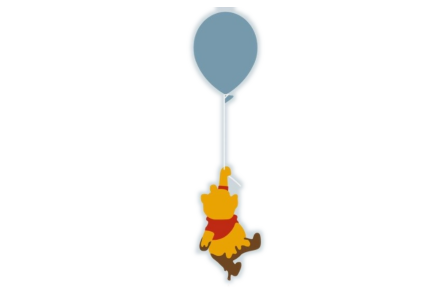

In [38]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(img_fin)
fig.savefig('/content/drive/MyDrive/ポートフォリオ/Pooh.png')